Bibliotecas

In [1]:
!python310.exe -m pip install --upgrade pip
%pip install yfinance
%pip install numpy
%pip install pandas
%pip install scipy
%pip install statsmodels
%pip install yfinance
%pip install seaborn
%pip install plotly
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [3]:
np.random.seed(13)
a = np.random.randint(50, size = 30)
b = np.random.randint(50, size = 30)
ab = zip(a,b)
fig = px.scatter(ab, x=a, y=b, template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))

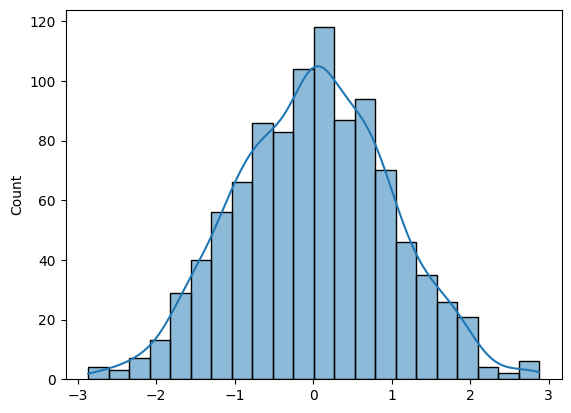

In [4]:
normal_dist = np.random.normal(0, 1, 1000)
normal_fig01 = sns.histplot(normal_dist, kde=True)

Medidas de Posição

In [5]:
print(np.mean(normal_dist))
print(np.median(normal_dist))
print(stats.mode(normal_dist))

0.0017066272520296834
0.0239444097099838
ModeResult(mode=-2.8662660210883883, count=1)


In [6]:
print(round(np.mean(normal_dist), 2))
print(round(np.median(normal_dist), 2))

0.0
0.02


In [7]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=['lightseagreen'])
fig01.add_vline(x=np.mean(normal_dist), line_width=3,  line_color="red")
fig01.add_vline(x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="red")
fig01.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

Testes de Normalidade

In [8]:
#pvalue > 0.05 são normais
teste_normalidade = stats.normaltest(normal_dist)
print(teste_normalidade)

NormaltestResult(statistic=1.2987341250431184, pvalue=0.5223763036889957)


In [9]:
normal_dist2 = normal_dist.copy()
normal_dist2 = normal_dist2.tolist()
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
teste_normalidade2 = stats.normaltest(normal_dist2)
print(teste_normalidade2)

NormaltestResult(statistic=197.45506590644098, pvalue=1.3279362501853236e-43)


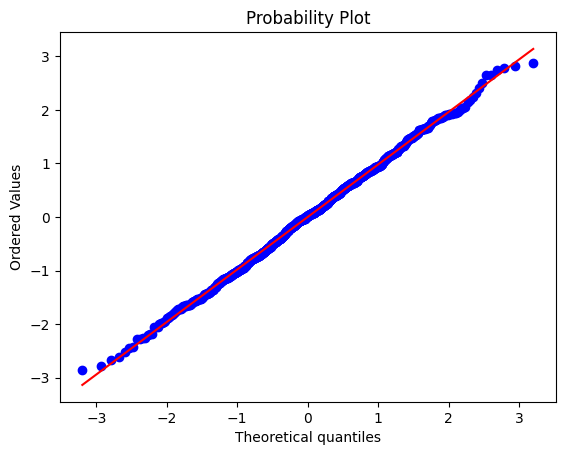

In [10]:
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.show()

In [11]:
fig02 = go.Figure()
fig02.add_trace(go.Box(y=normal_dist, boxpoints='all', boxmean='sd', name='<b>Normal distribution', marker_color = 'blue'))
fig02.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

In [12]:
print(np.quantile(normal_dist, 0.25))
print(np.percentile(normal_dist, 25))

-0.7102216215806376
-0.7102216215806376


In [13]:
df_normal_distrib = pd.DataFrame(normal_dist)
df_normal_distrib.describe()

,0
count,1000.000000
mean,0.001707
std,0.979604
min,-2.866266
25%,-0.710222
50%,0.023944
75%,0.651647
max,2.879035


In [14]:
stats.skew(normal_dist)

0.013535659786954618

In [15]:
# Amplitude para alvos/stops
amplitude = normal_dist.max() - normal_dist.min()
amplitude

5.74530113288316

In [16]:
# Desvio padrão da amostra (população degrees of freedom = False)
# Sharpe ratio, bandas de bollinger
desvio_padrao = np.std(normal_dist, ddof = True)
desvio_padrao

0.9796038897827954

In [17]:
# Coeficiente de variação
# Interessante para comparações e avaliar a consistência (ex., pagamento de dividendos)
normal_dist.std(ddof = True)/normal_dist.mean()*100

57399.99104184921

In [18]:
# Erro padrão da média

stats.sem(normal_dist)

0.030977794964741814

In [19]:
# Intervalo de confiança 95%
# Probabilidade de 95% da média real estar nesse intervalo

IC_95 = stats.t.interval(0.95, df=len(normal_dist)-1, loc=np.mean(normal_dist), scale=stats.sem(normal_dist))
IC_95

(-0.05908238418177415, 0.06249563868583352)